In [15]:
# Import dependencies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Covariates will be 'age' 'sex' 'bmi' 'children' 'smoker' 'region'
# Predictor will be 'charges'

# Need to one-hot encode the categorical covariates in the dataframe
insurance = pd.get_dummies(insurance)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
# Create X, y sets (features and labels)
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [13]:
# Inspect feature table
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [14]:
# Inspect label table
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [31]:
# Create neural network for regression
tf.random.set_seed(42)

# Create model
input = tf.keras.layers.Input(shape = (11,))
x = tf.keras.layers.Dense(10)(input)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = [input], outputs = [output])

# Compile model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Train model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8733.3457 - mae: 8733.3457
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7879.0942 - mae: 7879.0942
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7600.1792 - mae: 7600.1792
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7610.5063 - mae: 7610.5063
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7658.1431 - mae: 7658.1431
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7647.5244 - mae: 7647.5244
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7527.4790 - mae: 7527.4790
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7786.5391 - mae: 7786.5391
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7615.5103 - mae: 7615.5103
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7746.9292 - mae: 7746.9292

In [27]:
# Evaluate model on the test data
model.evaluate(X_test, y_test)

# Check median and mean predictor value to see if this model loss is any good
y.median(), y.mean()

9/9 [==============================] - 0s 3ms/step - loss: 7054.3486 - mae: 7054.3486


(9382.033, 13270.422265141257)

Right now the model doesn't seem to be performing very well.

To try and improve the model, two experiments are considered:
  1. Add an extra layer and used the Adam optimiser
  2. Same as above but also train for longer

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create new model
input = tf.keras.layers.Input(shape = (11,))
x = tf.keras.layers.Dense(100)(input)
x = tf.keras.layers.Dense(10)(x)
output = tf.keras.layers.Dense(1)(x)

model_2 = tf.keras.Model(inputs = [input], outputs = [output])

# Compile model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Train model
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13277.3340 - mae: 13277.3340
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13081.7031 - mae: 13081.7031
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12686.2178 - mae: 12686.2178
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11934.6826 - mae: 11934.6826
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10727.3359 - mae: 10727.3359
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9266.8975 - mae: 9266.8975
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8014.9478 - mae: 8014.9478
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7501.9097 - mae: 7501.9097
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.7686 - mae: 7429.7686
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7410.8633 - mae:

In [34]:
# Evaluate larger model
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4947.9463 - mae: 4947.9463


[4947.9462890625, 4947.9462890625]

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create new model
input = tf.keras.layers.Input(shape = (11,))
x = tf.keras.layers.Dense(100)(input)
x = tf.keras.layers.Dense(10)(x)
output = tf.keras.layers.Dense(1)(x)

model_3 = tf.keras.Model(inputs = [input], outputs = [output])

# Compile model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Train model
history = model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13319.6738 - mae: 13319.6738
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13185.5234 - mae: 13185.5234
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12903.0137 - mae: 12903.0137
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12322.0283 - mae: 12322.0283
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11291.7471 - mae: 11291.7471
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9854.7646 - mae: 9854.7646
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8412.8613 - mae: 8412.8613
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7595.8408 - mae: 7595.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7435.5967 - mae: 7435.5967
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7412.7314 - mae:

In [36]:
# Evaluate third model
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3493.1472 - mae: 3493.1472


[3493.147216796875, 3493.147216796875]

In [37]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8975.4414 - mae: 8975.4414


[8975.44140625, 8975.44140625]

Text(0, 0.5, 'loss')

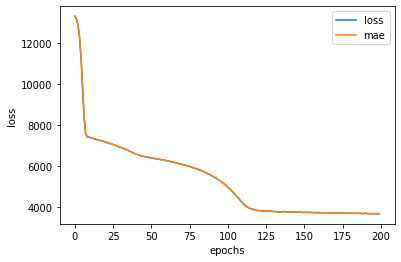

In [39]:
# Plot history
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

## Preprocessing Input Data (normalisation and standardisation)

In [40]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# Normalise numerical covariates
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer
# Normalise (put in range [0,1]) for numerical covariates 
# One-hot encode categorical covariates
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create input and output data
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to training data
ct.fit(X_train)

# Transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [46]:
# Inspect data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [48]:
print(X_train_normal[0])
X_train_normal.shape

[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]


(1070, 11)

In [51]:
# New model for this normalised data
# Set random seed
tf.random.set_seed(42)

# Create new model
input = tf.keras.layers.Input(shape = (11,))
x = tf.keras.layers.Dense(100)(input)
x = tf.keras.layers.Dense(10)(x)
output = tf.keras.layers.Dense(1)(x)

model_4 = tf.keras.Model(inputs = [input], outputs = [output])

# Compile model
model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Train model
history = model_4.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13343.4678 - mae: 13343.4678
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13334.1650 - mae: 13334.1650
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13311.3506 - mae: 13311.3506
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13264.3594 - mae: 13264.3594
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13181.9248 - mae: 13181.9248
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13053.0127 - mae: 13053.0127
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12867.4238 - mae: 12867.4238
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12615.1621 - mae: 12615.1621
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12286.1475 - mae: 12286.1475
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11877.64

Text(0, 0.5, 'loss')

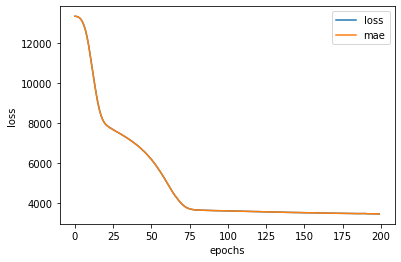

In [52]:
# Plot history
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [54]:
# Evaluate model with normalised input data
model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.2532 - mae: 3167.2532


[3167.253173828125, 3167.253173828125]